In [61]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
pd.set_option('display.max_columns',None)
data = pd.read_csv("~/desktop/finaldata.csv")


In [63]:
data

,Unnamed: 0,STATE,Year,CO2,CH4,N2O,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question,DataValue,StratificationCategory1,Stratification1,Population,Total Sq. Mi.,Total Sq. Km.
0,0,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Mortality from diseases of the heart,234.8,Gender,Female,4815588,"52,420","135,767"
1,1,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,14.9,Gender,Female,4815588,"52,420","135,767"
2,2,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.6,Gender,Male,4815588,"52,420","135,767"
3,3,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.9,Race/Ethnicity,"White, non-Hispanic",4815588,"52,420","135,767"
4,4,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,21.8,Race/Ethnicity,"Black, non-Hispanic",4815588,"52,420","135,767"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22463,22463,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",25.6,Race/Ethnicity,"White, non-Hispanic",662328,68,177
22464,22464,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",22.4,Race/Ethnicity,Asian or Pacific Islander,662328,68,177
22465,22465,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",NaN,Race/Ethnicity,American Indian or Alaska Native,662328,68,177
22466,22466,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",48.3,Overall,Overall,662328,68,177


In [64]:
data['CO2_PER_POP'] = data['CO2'] / data['Population']

data['CH4_PER_POP'] = data['CH4'] / data['Population']

data['N2O_PER_POP'] = data['N2O'] / data['Population']

data['Fluorinated GHG_PER_POP'] = data['Fluorinated GHG'] / data['Population']

data

,Unnamed: 0,STATE,Year,CO2,CH4,N2O,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question,DataValue,StratificationCategory1,Stratification1,Population,Total Sq. Mi.,Total Sq. Km.,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Fluorinated GHG_PER_POP
0,0,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Mortality from diseases of the heart,234.8,Gender,Female,4815588,"52,420","135,767",17.472089,0.145715,0.125172,0.054913
1,1,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,14.9,Gender,Female,4815588,"52,420","135,767",17.472089,0.145715,0.125172,0.054913
2,2,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.6,Gender,Male,4815588,"52,420","135,767",17.472089,0.145715,0.125172,0.054913
3,3,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.9,Race/Ethnicity,"White, non-Hispanic",4815588,"52,420","135,767",17.472089,0.145715,0.125172,0.054913
4,4,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,21.8,Race/Ethnicity,"Black, non-Hispanic",4815588,"52,420","135,767",17.472089,0.145715,0.125172,0.054913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22463,22463,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",25.6,Race/Ethnicity,"White, non-Hispanic",662328,68,177,0.434042,0.000237,0.000332,0.000000
22464,22464,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",22.4,Race/Ethnicity,Asian or Pacific Islander,662328,68,177,0.434042,0.000237,0.000332,0.000000
22465,22465,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",NaN,Race/Ethnicity,American Indian or Alaska Native,662328,68,177,0.434042,0.000237,0.000332,0.000000
22466,22466,DC,2014,287478,157,220,0,4,3,0,0.045100,"Cancer of the lung and bronchus, incidence",48.3,Overall,Overall,662328,68,177,0.434042,0.000237,0.000332,0.000000


In [65]:
data.drop(['STATE', 'Year','CO2','CH4','N2O','Fluorinated GHG_PER_POP','Population','Total Sq. Mi.','Total Sq. Km.'], axis=1, inplace=True)

In [66]:
data = data[~data['StratificationCategory1'].isnull()]
cols = data.columns.tolist()
cols = cols[6:] + cols[:6]
data = data[cols]

In [67]:
data['Question'].unique()

array(['Mortality from diseases of the heart', 'Asthma mortality rate',
       'Mortality from heart failure',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Mortality from coronary heart disease',
       'Premature mortality among adults aged 45-64 years',
       'Mortality from total cardiovascular diseases',
       'Invasive cancer (all sites combined), incidence',
       'Cancer of the lung and bronchus, incidence'], dtype=object)

In [68]:
data['StratificationCategory1'].unique()

array(['Gender', 'Race/Ethnicity', 'Overall'], dtype=object)

In [69]:
data.head()

,Question,DataValue,StratificationCategory1,Stratification1,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
0,Mortality from diseases of the heart,234.8,Gender,Female,17.472089,0.145715,0.125172,0,264437,3,7,4,0.044215
1,Asthma mortality rate,14.9,Gender,Female,17.472089,0.145715,0.125172,1,264437,3,7,4,0.044215
2,Asthma mortality rate,8.6,Gender,Male,17.472089,0.145715,0.125172,2,264437,3,7,4,0.044215
3,Asthma mortality rate,8.9,Race/Ethnicity,"White, non-Hispanic",17.472089,0.145715,0.125172,3,264437,3,7,4,0.044215
4,Asthma mortality rate,21.8,Race/Ethnicity,"Black, non-Hispanic",17.472089,0.145715,0.125172,4,264437,3,7,4,0.044215


In [70]:
data.shape

(22416, 13)

In [71]:
data.isnull().sum()

Question                         0
DataValue                     5297
StratificationCategory1          0
Stratification1                  0
CO2_PER_POP                      0
CH4_PER_POP                      0
N2O_PER_POP                      0
Unnamed: 0                       0
Fluorinated GHG                  0
Laws and Regulations             0
State Incentives                 0
Utility/Private Incentives       0
Ozone                            0
dtype: int64

## Question

### · "Mortality from total cardiovascular diseases"
### · "Premature mortality among adults aged 45-64 years"
### · "Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years"


#### 1. Mortality from total cardiovascular diseases

In [72]:
data_q1 = data[data['Question']=='Mortality from total cardiovascular diseases']      

In [73]:
data_q1[data_q1['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

Question                        0
DataValue                     315
StratificationCategory1         0
Stratification1                 0
CO2_PER_POP                     0
CH4_PER_POP                     0
N2O_PER_POP                     0
Unnamed: 0                      0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
dtype: int64

In [74]:
data_q1[data_q1['StratificationCategory1']=='Gender'].isnull().sum()

Question                      0
DataValue                     0
StratificationCategory1       0
Stratification1               0
CO2_PER_POP                   0
CH4_PER_POP                   0
N2O_PER_POP                   0
Unnamed: 0                    0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
dtype: int64

In [75]:
data_q1_1 = data_q1[data_q1['StratificationCategory1']=='Race/Ethnicity']
data_q1_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q1_1 = data_q1_1[~data_q1_1['DataValue'].isnull()]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
data_q1_1.head()

,DataValue,Stratification1,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
17,29.1,Hispanic,17.472089,0.145715,0.125172,17,264437,3,7,4,0.044215
18,368.0,"White, non-Hispanic",17.472089,0.145715,0.125172,18,264437,3,7,4,0.044215
34,284.5,"Black, non-Hispanic",17.472089,0.145715,0.125172,34,264437,3,7,4,0.044215
37,38.8,Asian or Pacific Islander,17.472089,0.145715,0.125172,37,264437,3,7,4,0.044215
70,103.8,American Indian or Alaska Native,17.472089,0.145715,0.125172,70,264437,3,7,4,0.044215


In [88]:
data_q1_2 = data_q1[data_q1['StratificationCategory1']=='Gender']
data_q1_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
data_q1_2.head()

,DataValue,Stratification1,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
48,319.1,Female,17.472089,0.145715,0.125172,48,264437,3,7,4,0.044215
57,333.5,Male,17.472089,0.145715,0.125172,57,264437,3,7,4,0.044215
116,319.4,Female,17.245662,0.123060,0.093460,116,274194,3,7,4,0.039733
117,354.0,Male,17.245662,0.123060,0.093460,117,274194,3,7,4,0.039733
163,349.2,Male,17.523932,0.130945,0.108513,163,312201,3,7,4,0.040936


### label encoding

In [79]:
data_q1_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q1_1 = pd.get_dummies(data_q1_1, columns = ['Race'], drop_first = True)

In [80]:
data_q1_1.head()

,DataValue,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Race_Asian or Pacific Islander,"Race_Black, non-Hispanic",Race_Hispanic,"Race_White, non-Hispanic"
17,29.1,17.472089,0.145715,0.125172,17,264437,3,7,4,0.044215,0,0,1,0
18,368.0,17.472089,0.145715,0.125172,18,264437,3,7,4,0.044215,0,0,0,1
34,284.5,17.472089,0.145715,0.125172,34,264437,3,7,4,0.044215,0,1,0,0
37,38.8,17.472089,0.145715,0.125172,37,264437,3,7,4,0.044215,1,0,0,0
70,103.8,17.472089,0.145715,0.125172,70,264437,3,7,4,0.044215,0,0,0,0


In [89]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q1_2['Stratification1'] = label_encoder.fit_transform(data_q1_2['Stratification1'])
data_q1_2.rename(columns={'Stratification1':'Male'}, inplace=True)

<ipython-input-89-39ca1a939b72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q1_2['Stratification1'] = label_encoder.fit_transform(data_q1_2['Stratification1'])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [90]:
data_q1_2.head()

,DataValue,Male,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
48,319.1,0,17.472089,0.145715,0.125172,48,264437,3,7,4,0.044215
57,333.5,1,17.472089,0.145715,0.125172,57,264437,3,7,4,0.044215
116,319.4,0,17.245662,0.123060,0.093460,116,274194,3,7,4,0.039733
117,354.0,1,17.245662,0.123060,0.093460,117,274194,3,7,4,0.039733
163,349.2,1,17.523932,0.130945,0.108513,163,312201,3,7,4,0.040936


### regression

In [91]:
X = data_q1_1.values[:,1:].copy()
y = data_q1_1.DataValue.values

#### linear regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.7796480332449808
0.7707981479694495


#### Random forest regression

In [93]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[7],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1          0.96297                  7              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 7, 'n_estimators': 50}
---- best accuracy ----
0.9629696591732619


#### Gradient Boosting Regression

In [94]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.940
Accuracy on test set: 0.891


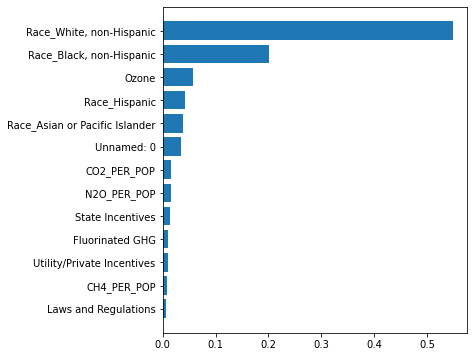

In [95]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q1_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

## gender

In [96]:
X = data_q1_2.values[:,1:].copy()
y = data_q1_2.DataValue.values

#### linear regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.33232223459918336
0.2861666038657399


#### Random forest regression

In [98]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[7],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1          0.91339                  7              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 7, 'n_estimators': 50}
---- best accuracy ----
0.9133896977802604


#### Gradient Boosting Regression

In [99]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.857


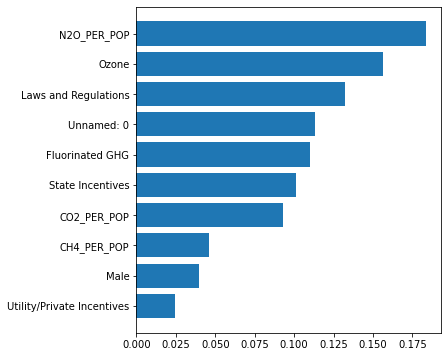

In [100]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q1_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### 2.Premature mortality among adults aged 45-64 years

In [102]:
data_q2 = data[data['Question']=='Premature mortality among adults aged 45-64 years']

In [103]:
data_q2[data_q2['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

Question                        0
DataValue                     280
StratificationCategory1         0
Stratification1                 0
CO2_PER_POP                     0
CH4_PER_POP                     0
N2O_PER_POP                     0
Unnamed: 0                      0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
dtype: int64

In [104]:
data_q2[data_q2['StratificationCategory1']=='Gender'].isnull().sum()

Question                      0
DataValue                     0
StratificationCategory1       0
Stratification1               0
CO2_PER_POP                   0
CH4_PER_POP                   0
N2O_PER_POP                   0
Unnamed: 0                    0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
dtype: int64

In [105]:
data_q2_1 = data_q2[data_q2['StratificationCategory1']=='Race/Ethnicity']
data_q2_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q2_1 = data_q2_1[~data_q2_1['DataValue'].isnull()]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [106]:
data_q2_1.head()

,DataValue,Stratification1,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
16,363.7,American Indian or Alaska Native,17.472089,0.145715,0.125172,16,264437,3,7,4,0.044215
23,832.5,"White, non-Hispanic",17.472089,0.145715,0.125172,23,264437,3,7,4,0.044215
27,198.1,Asian or Pacific Islander,17.472089,0.145715,0.125172,27,264437,3,7,4,0.044215
33,254.2,Hispanic,17.472089,0.145715,0.125172,33,264437,3,7,4,0.044215
59,1051.7,"Black, non-Hispanic",17.472089,0.145715,0.125172,59,264437,3,7,4,0.044215


In [107]:
data_q2_2 = data_q2[data_q2['StratificationCategory1']=='Gender']
data_q2_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [108]:
data_q2_2.head()

,DataValue,Stratification1,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
15,661.7,Female,17.472089,0.145715,0.125172,15,264437,3,7,4,0.044215
52,1085.7,Male,17.472089,0.145715,0.125172,52,264437,3,7,4,0.044215
128,672.2,Female,17.245662,0.123060,0.093460,128,274194,3,7,4,0.039733
134,1119.1,Male,17.245662,0.123060,0.093460,134,274194,3,7,4,0.039733
138,695.8,Female,17.523932,0.130945,0.108513,138,312201,3,7,4,0.040936


#### Label_encoding

In [109]:
data_q2_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q2_1 = pd.get_dummies(data_q2_1, columns = ['Race'], drop_first = True)

In [110]:
data_q2_1.head()

,DataValue,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Race_Asian or Pacific Islander,"Race_Black, non-Hispanic",Race_Hispanic,"Race_White, non-Hispanic"
16,363.7,17.472089,0.145715,0.125172,16,264437,3,7,4,0.044215,0,0,0,0
23,832.5,17.472089,0.145715,0.125172,23,264437,3,7,4,0.044215,0,0,0,1
27,198.1,17.472089,0.145715,0.125172,27,264437,3,7,4,0.044215,1,0,0,0
33,254.2,17.472089,0.145715,0.125172,33,264437,3,7,4,0.044215,0,0,1,0
59,1051.7,17.472089,0.145715,0.125172,59,264437,3,7,4,0.044215,0,1,0,0


In [111]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q2_2['Stratification1'] = label_encoder.fit_transform(data_q2_2['Stratification1'])
data_q2_2.rename(columns={'Stratification1':'Male'}, inplace=True)

<ipython-input-111-bf8dedff69de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q2_2['Stratification1'] = label_encoder.fit_transform(data_q2_2['Stratification1'])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [112]:
data_q2_2.head()

,DataValue,Male,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
15,661.7,0,17.472089,0.145715,0.125172,15,264437,3,7,4,0.044215
52,1085.7,1,17.472089,0.145715,0.125172,52,264437,3,7,4,0.044215
128,672.2,0,17.245662,0.123060,0.093460,128,274194,3,7,4,0.039733
134,1119.1,1,17.245662,0.123060,0.093460,134,274194,3,7,4,0.039733
138,695.8,0,17.523932,0.130945,0.108513,138,312201,3,7,4,0.040936


### Regression

### Race

In [113]:
X = data_q2_1.values[:,1:].copy()
y = data_q2_1.DataValue.values

#### Linear regression

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.6299407795972681
0.6208231857205377


#### Random Forest Regression

In [115]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[20],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.905246                  5              20
---- optimal parameters ----
{'max_depth': 20, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.9052459731466778


#### Gradient Boosting Regression

In [116]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.842
Accuracy on test set: 0.800


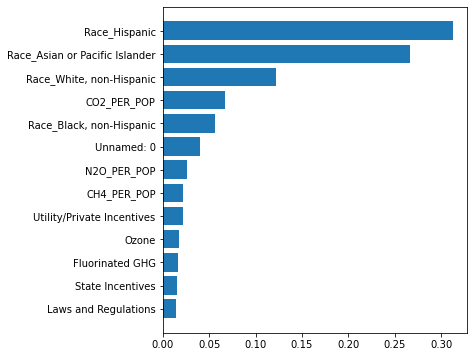

In [117]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q2_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Gender

In [118]:
X = data_q2_2.values[:,1:].copy()
y = data_q2_2.DataValue.values

#### Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.7327081397197985
0.7201486058369677


#### Random forest regression

In [120]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.953621                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.9536213947679565


#### Gradient Boosting Regression

In [122]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.926


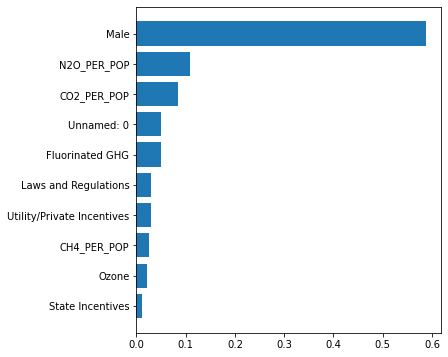

In [123]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q2_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### 3.Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years

In [124]:
data_q3 = data[data['Question']=='Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years']

In [125]:
data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

Question                        0
DataValue                     607
StratificationCategory1         0
Stratification1                 0
CO2_PER_POP                     0
CH4_PER_POP                     0
N2O_PER_POP                     0
Unnamed: 0                      0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
dtype: int64

In [126]:
data_q3[data_q3['StratificationCategory1']=='Gender'].isnull().sum()

Question                      0
DataValue                     0
StratificationCategory1       0
Stratification1               0
CO2_PER_POP                   0
CH4_PER_POP                   0
N2O_PER_POP                   0
Unnamed: 0                    0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
dtype: int64

In [127]:
data_q3_1 = data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity']
data_q3_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q3_1 = data_q3_1[~data_q3_1['DataValue'].isnull()]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [128]:
data_q3_1.head()

,DataValue,Stratification1,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
49,292.3,"White, non-Hispanic",17.472089,0.145715,0.125172,49,264437,3,7,4,0.044215
58,114.9,"Black, non-Hispanic",17.472089,0.145715,0.125172,58,264437,3,7,4,0.044215
84,128.0,"Black, non-Hispanic",17.245662,0.123060,0.093460,84,274194,3,7,4,0.039733
89,301.6,"White, non-Hispanic",17.245662,0.123060,0.093460,89,274194,3,7,4,0.039733
146,282.6,"White, non-Hispanic",17.523932,0.130945,0.108513,146,312201,3,7,4,0.040936


In [129]:
data_q3_2 = data_q3[data_q3['StratificationCategory1']=='Gender']
data_q3_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
data_q3_2.head()

,DataValue,Stratification1,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
11,215.4,Female,17.472089,0.145715,0.125172,11,264437,3,7,4,0.044215
14,279.9,Male,17.472089,0.145715,0.125172,14,264437,3,7,4,0.044215
80,220.3,Female,17.245662,0.123060,0.093460,80,274194,3,7,4,0.039733
90,294.1,Male,17.245662,0.123060,0.093460,90,274194,3,7,4,0.039733
150,208.9,Female,17.523932,0.130945,0.108513,150,312201,3,7,4,0.040936


#### Label encoding

In [131]:
data_q3_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q3_1 = pd.get_dummies(data_q3_1, columns = ['Race'], drop_first = True)

In [132]:
data_q3_1.head()

,DataValue,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Race_Asian or Pacific Islander,"Race_Black, non-Hispanic",Race_Hispanic,"Race_White, non-Hispanic"
49,292.3,17.472089,0.145715,0.125172,49,264437,3,7,4,0.044215,0,0,0,1
58,114.9,17.472089,0.145715,0.125172,58,264437,3,7,4,0.044215,0,1,0,0
84,128.0,17.245662,0.123060,0.093460,84,274194,3,7,4,0.039733,0,1,0,0
89,301.6,17.245662,0.123060,0.093460,89,274194,3,7,4,0.039733,0,0,0,1
146,282.6,17.523932,0.130945,0.108513,146,312201,3,7,4,0.040936,0,0,0,1


In [133]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q3_2['Stratification1'] = label_encoder.fit_transform(data_q3_2['Stratification1'])
data_q3_2.rename(columns={'Stratification1':'Male'}, inplace=True)

<ipython-input-133-02ef093b317c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q3_2['Stratification1'] = label_encoder.fit_transform(data_q3_2['Stratification1'])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [134]:
data_q3_2.head()

,DataValue,Male,CO2_PER_POP,CH4_PER_POP,N2O_PER_POP,Unnamed: 0,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
11,215.4,0,17.472089,0.145715,0.125172,11,264437,3,7,4,0.044215
14,279.9,1,17.472089,0.145715,0.125172,14,264437,3,7,4,0.044215
80,220.3,0,17.245662,0.123060,0.093460,80,274194,3,7,4,0.039733
90,294.1,1,17.245662,0.123060,0.093460,90,274194,3,7,4,0.039733
150,208.9,0,17.523932,0.130945,0.108513,150,312201,3,7,4,0.040936


### Regression

### Race

In [135]:
X = data_q3_1.values[:,1:].copy()
y = data_q3_1.DataValue.values

#### Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.7436027291450013
0.725830959678214


#### Random forest regression

In [137]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.934519                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.9345188543076935


#### Gradient Boosting Regression

In [138]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.914
Accuracy on test set: 0.803


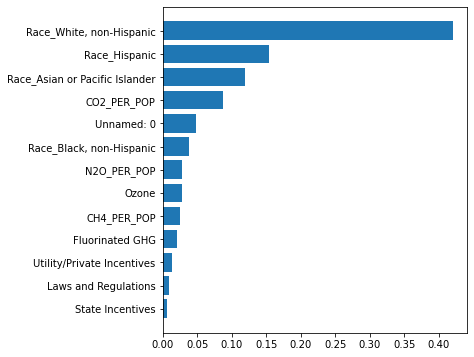

In [139]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q3_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Gender

In [140]:
X = data_q3_2.values[:,1:].copy()
y = data_q3_2.DataValue.values

#### Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.36147028582979973
0.31996431768729183


#### Random forest regression

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.908505                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.90850492525768


#### Gradient Boosting Regression

In [144]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.894


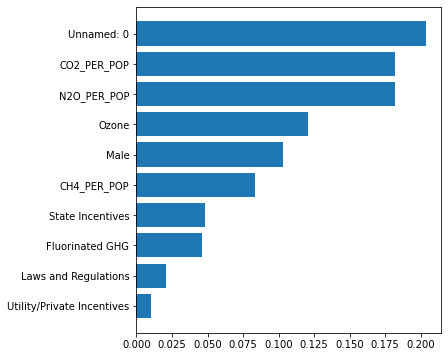

In [145]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q3_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()